In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
df = pd.read_csv("../../Milestone 3/data/processed/query_features_with_timestamp.csv")
print("Loaded data shape:", df.shape)
df.head()

Loaded data shape: (8956, 770)


,query_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f759,f760,f761,f762,f763,f764,f765,f766,f767,event_timestamp
0,113370,0.258986,-0.027564,0.276113,-0.224378,-0.175721,0.441630,-0.433628,0.378962,-0.357981,...,-0.584825,0.383922,-0.937421,0.237203,0.441037,0.164361,0.354884,0.030042,-0.173899,2025-03-27 07:01:04.332726+00:00
1,113376,0.536288,0.302481,0.338010,-0.335701,0.082461,-0.327598,-0.128405,0.244543,-0.038849,...,-0.236155,0.501087,-0.653869,0.063183,-0.144010,0.228562,0.007664,0.287430,-0.210877,2025-03-27 07:01:04.332726+00:00
2,113379,-0.211941,-0.603750,0.911297,-0.298135,-0.428725,0.105656,-0.122141,0.258227,-0.612179,...,-0.583509,0.022270,-1.073287,0.192814,-0.143980,0.073164,0.496558,0.227491,-0.139115,2025-03-27 07:01:04.332726+00:00
3,113381,0.538125,0.495269,0.389920,0.248746,-0.348640,0.115813,-0.029949,-0.156427,-0.437747,...,-0.279470,0.261664,-0.921650,0.390631,-0.057740,-0.144272,0.009533,-0.548613,-0.171548,2025-03-27 07:01:04.332726+00:00
4,113385,0.416974,0.388191,-0.261935,-0.005483,0.311761,0.094630,0.299291,-0.063912,0.627821,...,-0.180703,0.192929,-0.065481,0.033572,0.199991,-0.090573,-0.112493,0.147670,-0.128924,2025-03-27 07:01:04.332726+00:00


In [19]:
features = [col for col in df.columns if col.startswith('f')]
X = df[features].values

np.random.seed(42)
df["label"] = np.random.randint(0, 2, size=len(df))
y = df["label"].values

print("Features:", X.shape, "Labels:", y.shape)

Features: (8956, 768) Labels: (8956,)


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(768,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               196864    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 229889 (898.00 KB)
Trainable params: 229889 (898.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="../models/checkpoints/epoch_{epoch:02d}_valacc_{val_accuracy:.4f}.h5",
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=False,
    verbose=1
)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint_cb, early_stop_cb]
)

Epoch 1/50
150/180 [========================>.....] - ETA: 0s - loss: 0.5533 - accuracy: 0.7244
Epoch 1: saving model to ../models/checkpoints/epoch_01_valacc_0.4941.h5
180/180 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7180 - val_loss: 0.7748 - val_accuracy: 0.4941
Epoch 2/50
155/180 [========================>.....] - ETA: 0s - loss: 0.4883 - accuracy: 0.7712
Epoch 2: saving model to ../models/checkpoints/epoch_02_valacc_0.4955.h5
180/180 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7660 - val_loss: 0.8113 - val_accuracy: 0.4955
Epoch 3/50
159/180 [=========================>....] - ETA: 0s - loss: 0.4079 - accuracy: 0.8213
Epoch 3: saving model to ../models/checkpoints/epoch_03_valacc_0.4836.h5
180/180 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8164 - val_loss: 0.8929 - val_accuracy: 0.4836
Epoch 4/50
157/180 [=========================>....] - ETA: 0s - loss: 0.3472 - accuracy: 0.8589
Epoc

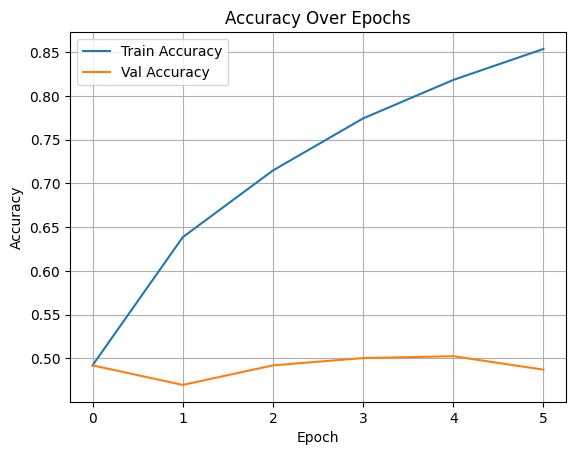

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
model.save("../models/final_model")
print("✅ Final model saved (for reference)")

INFO:tensorflow:Assets written to: ../models/final_model/assets


INFO:tensorflow:Assets written to: ../models/final_model/assets


✅ Final model saved (for reference)
